In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [75]:
# Read the CSV file into a DataFrame
data = pd.read_csv('results.txt', sep='\s+', header=None)
data.columns = ['method', 'nodes', 'vertices', 'edges', 'features', 'forcomp', 'forcomm', 'backcomp', 'backcomm']
data['forward'] = data['forcomp'] + data['forcomm']
data['backward'] = data['backcomp'] + data['backcomm']
data['total'] = data['forward'] + data['backward']
data['density'] = data['edges'] / (data['vertices'] * data['vertices'])
data['forratio'] = data['forcomm'] / data['forward']
data['backratio'] = data['backcomm'] / data['backward']
# pd.set_option('display.max_rows', None)
data.sort_values(by=['method', 'nodes', 'features'], inplace=True)
data

,method,nodes,vertices,edges,features,forcomp,forcomm,backcomp,backcomm,forward,backward,total,density,forratio,backratio
15,AGNN,4,262144,6871948,16,0.038564,0.021196,0.082805,0.035461,0.059759,0.118266,0.178025,0.0001,0.354685,0.299839
34,AGNN,4,262144,68719477,16,0.085091,0.025107,0.223049,0.059873,0.110199,0.282923,0.393121,0.0010,0.227838,0.211624
50,AGNN,4,262144,687194767,16,0.325920,0.034329,0.987051,0.092326,0.360250,1.079377,1.439627,0.0100,0.095293,0.085537
80,AGNN,4,524288,27487791,16,0.079733,0.029194,0.218536,0.084337,0.108928,0.302874,0.411801,0.0001,0.268017,0.278456
93,AGNN,4,1048576,109951163,16,0.272364,0.083381,0.666691,0.216122,0.355745,0.882813,1.238558,0.0001,0.234384,0.244811
35,AGNN,4,262144,6871948,128,0.302201,0.071784,0.650570,0.145047,0.373985,0.795617,1.169602,0.0001,0.191943,0.182307
44,AGNN,4,262144,68719477,128,0.478907,0.080629,1.219801,0.212801,0.559536,1.432603,1.992138,0.0010,0.144099,0.148542
86,AGNN,4,262144,687194767,128,1.161121,0.099495,3.597468,0.335613,1.260616,3.933081,5.193697,0.0100,0.078926,0.085331
97,AGNN,4,524288,27487791,128,0.690633,0.221202,1.533886,0.571708,0.911835,2.105594,3.017429,0.0001,0.242590,0.271519
114,AGNN,4,1048576,109951163,128,1.710917,0.443135,3.881229,1.168922,2.154052,5.050151,7.204204,0.0001,0.205722,0.231463


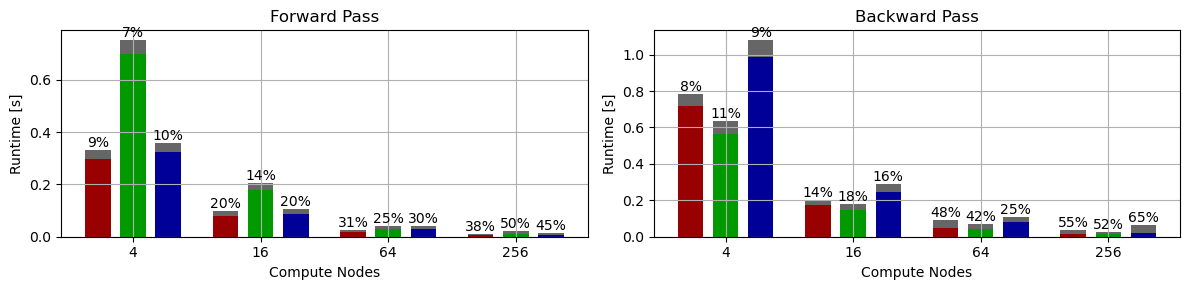

In [101]:
sample = data[(data['edges'] == 687194767) & (data['vertices'] == 262144)]
x = np.arange(len(sample['nodes'].unique())) * 4

fig, axes = plt.subplots(1, 2, figsize=(12, 3))
width = 0.8
for ax, pas in zip(axes, ['for', 'back']):
    offset = 0  
    for model in ['VA', 'GAT', 'AGNN']:
        if model == "VA":
            col = "#990000"
        elif model == "GAT":
            col = "#009900"
        else:
            col = "#000099"
        black = "#000000"
        darkgrey = "#666666"
        current_sample = sample[(sample['method'] == model) & (sample['features'] == 16)]
        ax.bar(x + offset, current_sample[f'{pas}comp'], width=width, color=col)
        p = ax.bar(x + offset, current_sample[f'{pas}comm'], width=width, bottom=current_sample[f'{pas}comp'], color=darkgrey)
        ax.bar_label(p, current_sample[f'{pas}ratio'].map(lambda x: f'{x * 100:.0f}%'), label_type='edge')
        offset += 1.1
    if pas == 'for':
        ax.set_title("Forward Pass")    
    else:
        ax.set_title("Backward Pass")
    ax.grid(which = "major")
    ax.grid(which = "minor", linewidth = 0.2)
    # Set x tick positions and labels
    ax.set_xticks(x + 1.1)
    ax.set_xticklabels(sample['nodes'].unique())

    ax.set_xlabel("Compute Nodes")
    ax.set_ylabel("Runtime [s]")

# Display the plot
plt.tight_layout()
plt.show()


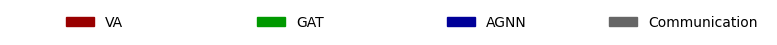

In [106]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Manually define the labels and colors for the legends
legend_labels = ['VA', 'GAT', 'AGNN', 'Communication']
legend_colors = ["#990000", "#009900", "#000099", "#666666"]

# Create the custom legend handles
legend_handles = [mpatches.Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]

# Create a figure with multiple axes for legends
fig, axes = plt.subplots(1, 4, figsize=(8, 0.5))

# Iterate over the axes and add legends
for ax, handle in zip(axes, legend_handles):
    ax.axis('off')  # Remove axes and ticks
    ax.legend(handles=[handle], frameon=False, loc='center')

# Show the figure
plt.tight_layout()
plt.show()